In [1]:
import numpy as np
import os
print (os.system("./script createmodule"))
import fort_analysis as fort
import helper as hlp
import matplotlib.pyplot as plt
import glob

0


In [2]:
def diff_fit(x,D,c):
    return 6*D*x+c

/project/palmer/Ankur/lammps_zeolite/zeo_noal_methanol_reax
['3']
Number of atoms:  2430 <type 'int'> Number of frames/time 2279 / 569.75 Start frame number/time 800 / 200
20.37095069885254 20.292892456054688 13.621012687683105
<type 'numpy.ndarray'> (21,) 21
[ 1.48311925  3.06724964  4.22147963  5.26368284  6.1872619   6.87801521
  7.41211834  7.95635447  8.24220557  8.60818708  8.93573059  9.16684659
  9.45325187  9.61518122  9.85480386 10.09879989 10.25910781 10.51327082
 10.71750099 10.92815845 11.05861597 11.20942377 11.41959621 11.48284724
 11.68208162 11.82707918 11.94907007 12.05877596 12.08589652 12.29744824
 12.46146735 12.57772722 12.67177468 12.61458825 12.80937482 12.96635739
 13.05337201 13.17376068 13.15926614 13.32862223 13.43159359 13.45819916
 13.58305162 13.58635953 13.75514411 13.90087591 14.05570967 14.19788099
 14.13298068 14.29484323 14.47974712 14.5499248  14.64788548 14.59227778
 14.72298462 14.81979629 14.872738   14.98426916 14.95380187 15.0846781
 15.1689292

Slope: 0.78
('Slope: ', 4.337740163225737, ' x 10^(-10) m2s-1')


/share/apps/anaconda2-5.2.0/lib/python2.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log


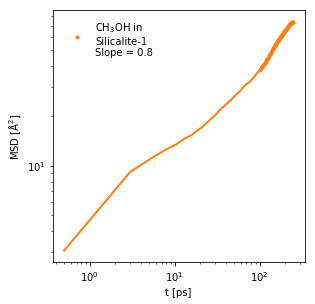

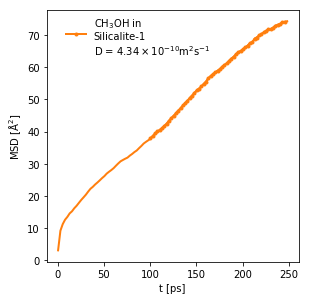

In [3]:
fig1 = plt.figure(figsize=(3.5,3.5))
ax1 = fig1.add_axes([0,0,1,1])
fig2 = plt.figure(figsize=(3.5,3.5))
ax2 = fig2.add_axes([0,0,1,1])
#for xtcname,cpname,lab,mark,deltat in zip(["/project/palmer/Ankur/lammps_zeolite/nonreax/222_woal/relax_half_fs/insert_nvt_nve",
#                           "/project/palmer/Ankur/lammps_zeolite/nonreax/222_woal/relax_two_fs/insert_nvt_nve",
#                           "/project/palmer/Ankur/lammps_zeolite/nonreax/222_wal/relax_half_fs/insert_nvt_nve",
#                           "/project/palmer/Ankur/lammps_zeolite/nonreax/222_wal/relax_two_fs/insert_nvt_nve"],
#                           ["woal_half_nve.xtc","woal_two_nve.xtc","wal_half_nve.xtc","wal_two_nve.xtc"],
#                           ["Si","Si","si-Al","Si-Al"],['o','*','s','+'],[0.125,0.5,0.125,0.5]
#                            ):
for xtcname,cpname,lab,mark,deltat in zip(["/project/palmer/Ankur/lammps_zeolite/zeo_noal_methanol_reax"],
                           ["woAl_reax.xtc"],
                           [r'CH$\rm _3$OH in'+"\n"+"Silicalite-1"],['o','+'],[0.25]
                            ):

    print (xtcname)
    os.system("cp "+xtcname+"/dump_reax.xtc"+" /project/palmer/Ankur/lammps_zeolite/zeo_noal_methanol_reax/msdcalc/"+cpname)
    os.system("cp "+xtcname+"/dump.start"+" /project/palmer/Ankur/lammps_zeolite/zeo_noal_methanol_reax/msdcalc/dump.em")    
    os.system("cd /project/palmer/Ankur/lammps_zeolite/zeo_noal_methanol_reax/msdcalc ; ./vmdscript "+cpname+" "+"dump.em")
    os.system("cd /home/aagarwa6/str_dyn_scripts/fromgithub/fortan_dcd_analysis/")
    fname = "/project/palmer/Ankur/lammps_zeolite/zeo_noal_methanol_reax/msdcalc/test.dcd"
    groname = "/project/palmer/Ankur/lammps_zeolite/zeo_noal_methanol_reax/msdcalc/test.gro"
    ndxname="/project/palmer/Ankur/lammps_zeolite/zeo_noal_methanol_reax/msdcalc/test.ndx"
    funit = 500
    atomid = hlp.readgro('3',groname) #hlp.getnameandid_fromndx(ndxname)
    #masses = hlp.getmass(groname)
    #print masses
    tstart = 200
    start = int(tstart/deltat)
    tatom, tframe, box = fort.readheaderdcd(fname)
    print "Number of atoms: ",tatom, type(tatom), "Number of frames/time",tframe,"/",tframe*deltat,"Start frame number/time",start,"/",tstart
    print box[0]/2., box[1]/2., box[2]/2.
    print type(atomid['3']),atomid['3'].shape,len(atomid['3'])
    #print atomid['11']
    maxdtsteps = 1000
    dt_3dmsd = np.linspace(1,maxdtsteps,maxdtsteps)
    #deltat = 2 #0.5 #0.5 #ps
    dnt = 5
    chop = 1
    dr_3dmsd = np.zeros(dt_3dmsd.shape)
    dx_3dmsd = np.zeros(dt_3dmsd.shape)
    dy_3dmsd = np.zeros(dt_3dmsd.shape)
    dz_3dmsd = np.zeros(dt_3dmsd.shape)
    n_3dmsd = np.zeros(dt_3dmsd.shape)

    for step in range(start,tframe-10,dnt):
        dr_dt_3dmsd, dx_dt_3dmsd, dy_dt_3dmsd, dz_dt_3dmsd, n_dt_3dmsd = fort.msd(atomid['3'],
                                                                                  fname,step,1,
                                                                                  tframe,tatom,
                                                                                  maxdtsteps,
                                                                                  len(atomid['3']))
        dr_3dmsd = dr_3dmsd + dr_dt_3dmsd
        dx_3dmsd = dx_3dmsd + dx_dt_3dmsd
        dy_3dmsd = dy_3dmsd + dy_dt_3dmsd
        dz_3dmsd = dz_3dmsd + dz_dt_3dmsd
        n_3dmsd = n_3dmsd + n_dt_3dmsd

    n_3dmsd[n_3dmsd == 0] = 1
    dr_3dmsd = dr_3dmsd/n_3dmsd
    dx_3dmsd = dx_3dmsd/n_3dmsd
    dy_3dmsd = dy_3dmsd/n_3dmsd
    dz_3dmsd = dz_3dmsd/n_3dmsd
    dt_3dmsd = dt_3dmsd*deltat
    print (dr_3dmsd)
    np.savetxt(xtcname+"/msd.txt",(dt_3dmsd,dr_3dmsd),delimiter=',', newline='\n\n',header='#Row1: Lag time [ps], #Row2: MSD [Angstrom^2]',fmt="%s")


    from scipy import stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(dt_3dmsd)[int(100/deltat):-10],np.log(dr_3dmsd)[int(100/deltat):-10])
    print ("Slope: %.2f" % (slope))
    ax1.loglog(dt_3dmsd[chop:-5:10],dr_3dmsd[chop:-5:10],marker=mark,markersize=0,linewidth=2,c='C1')
    ax1.loglog(dt_3dmsd[int(100/deltat):-10:10],dr_3dmsd[int(100/deltat):-10:10],marker=mark,markersize=3,linewidth=0,label=lab+"\nSlope = %.1f" % (slope),c='C1')
    from scipy.optimize import curve_fit
    slope, pcov = curve_fit(diff_fit, dt_3dmsd[int(100/deltat):-10]*(10**(-12)), dr_3dmsd[int(100/deltat):-10]*(10**(-20)))
    #slope, intercept, r_value, p_value, std_err = stats.linregress((dt_3dmsd)[100:-100],(dr_3dmsd)[100:-100])
    print ("Slope: " , (slope[0]*(10**10))," x 10^(-10) m2s-1")
    ax2.plot(dt_3dmsd[chop:-5:10],dr_3dmsd[chop:-5:10],marker=mark,markersize=0,linewidth=2,c='C1')
    ax2.plot(dt_3dmsd[int(100/deltat):-10:10],dr_3dmsd[int(100/deltat):-10:10],marker=mark,markersize=3,linewidth=2,label=lab+"\nD = %.2f" % (slope[0]*(10**10))+r'$\rm \times 10^{-10} m^2 s^{-1}$',c='C1')
    #print (intercept)
ax1.set_xlabel("t [ps]")
ax1.set_ylabel(r'MSD $\rm [\AA ^2]$')
ax2.set_xlabel("t [ps]")
ax2.set_ylabel(r'MSD $\rm [\AA ^2]$')
#ax2.text(200,250,"Reference: %.2f" % (12.1)+r'$\times 10^{-10} m^2 s^{-1}$')
fig1.legend(loc=[0.2,0.8], frameon = False)
fig2.legend(loc=[0.2,0.8], frameon = False)

In [4]:
for svt in ["pdf","png","svg"]:
    fig2.savefig('comparison_ref_reproducev3.'+svt,bbox_inches='tight',dpi=800)

In [5]:
for svt in ["pdf","png","svg"]:
    fig1.savefig('comparison_ref_reproduce_loglogv3.'+svt,bbox_inches='tight',dpi=800)